<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ 2 CLASS CLASSIFICATION MANUAL AND CLASS WEIGHTS STRATEGY✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\stft"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">converting to 2 class</span>
</div>

In [3]:
for i in range (len(labels_fold_1)):
    if (labels_fold_1[i] == 2):
        labels_fold_1[i] = 1

for i in range (len(labels_fold_2)):
    if (labels_fold_2[i] == 2):
        labels_fold_2[i] = 1

for i in range (len(labels_fold_3)):
    if (labels_fold_3[i] == 2):
        labels_fold_3[i] = 1

for i in range (len(labels_fold_4)):
    if (labels_fold_4[i] == 2):
        labels_fold_4[i] = 1

for i in range (len(labels_fold_5)):
    if (labels_fold_5[i] == 2):
        labels_fold_5[i] = 1

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [4]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)


    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)


    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [5]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=2):
    """
    Computes and visualizes classification metrics.

    Args:
        labels (array-like): True class labels.
        predictions (array-like): Probabilities or class predictions.
        n_classes (int): Number of classes (default: 2 for binary classification).
    """
    
    # Convert probability predictions to class labels if needed
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Compute Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    class_accuracies = []
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        accuracy = correct_preds / total_true_samples if total_true_samples > 0 else 0
        class_accuracies.append(accuracy)
        print(f'Class {d}: {correct_preds}/{total_true_samples} ({accuracy:.2%})')

    # Precision-Recall Curve & AUPRC
    print("\nPrecision-Recall Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        precision, recall, _ = precision_recall_curve(labels, predictions[:, 1])
        auprc = auc(recall, precision)
        plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
        avg_auprc = auprc
    else:
        # Multi-class case
        labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
        auprcs = []
        for class_idx in range(n_classes):
            precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            auprc = auc(recall, precision)
            auprcs.append(auprc)
            plt.plot(recall, precision, label=f'Class {class_idx} (AUPRC = {auprc:.2f})')
        avg_auprc = np.mean(auprcs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve & AUC
    print("\nROC Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    else:
        # Multi-class case
        for class_idx in range(n_classes):
            fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute Metrics
    f1 = f1_score(labels, predicted_classes, average='macro')
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)

    print(f"\nMean F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average AUPRC: {avg_auprc:.4f}")

    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": class_accuracies,
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
    }


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [7]:
import torch
import torch.nn as nn

debug_mode_flag = False
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set random seed for reproducibility
torch.manual_seed(42)
debug_mode_flag = False

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.layernorm2 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

    def forward(self, x):
        attn_output, _ = self.att(x, x, x)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class TransformerModel(nn.Module):
    def __init__(self, input_shape, num_classes, embed_dim=64, num_heads=2, ff_dim=64, num_transformer_blocks=2,dropout_rate=0.1):
        super(TransformerModel, self).__init__()
        self.reshape = nn.Flatten(start_dim=2)  # Reshaping as in TensorFlow's Reshape
        self.embedding = nn.Linear(input_shape[1] * input_shape[2], embed_dim)
        self.transformer_blocks = nn.ModuleList(
            [TransformerBlock(embed_dim, num_heads, ff_dim,dropout_rate=dropout_rate) for _ in range(num_transformer_blocks)]
        )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.reshape(x)
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # PyTorch uses (seq_len, batch, embed_dim) format for transformers
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x)
        x = x.permute(1, 2, 0)  # Back to (batch, embed_dim, seq_len)
        x = self.global_avg_pool(x).squeeze(-1)
        x = self.dropout(x)
        return self.classifier(x)


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [8]:
model  = TransformerModel(input_shape=(224,224,3),num_classes=2) # declare model here
randomdata = torch.randn((1,224,224,3))
output = model(randomdata)
output.shape

torch.Size([1, 2])

In [9]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                       Param #
TransformerModel                                             --
├─Flatten: 1-1                                               --
├─Linear: 1-2                                                43,072
├─ModuleList: 1-3                                            --
│    └─TransformerBlock: 2-1                                 --
│    │    └─MultiheadAttention: 3-1                          16,640
│    │    └─Sequential: 3-2                                  8,320
│    │    └─LayerNorm: 3-3                                   128
│    │    └─LayerNorm: 3-4                                   128
│    │    └─Dropout: 3-5                                     --
│    │    └─Dropout: 3-6                                     --
│    └─TransformerBlock: 2-2                                 --
│    │    └─MultiheadAttention: 3-7                          16,640
│    │    └─Sequential: 3-8                                  8,320
│    │    └─Lay

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>

In [10]:
import pandas as pd
import os
import datetime


torch.random.manual_seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility



params = {'num_heads': 8, 'num_transformer_blocks': 4, 'learning_rate': 1.3118115202018828e-05, 'optimizer': 'AdamW', 'weight_decay': 2.4521502046644974e-05, 'batch_size': 10, 'embed_dim': 256, 'ff_dim': 32}

# Fold indices and other configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)

test_folds_chosen = []
val_folds_chosen = []
fold_confusion_matrices = []  # To store confusion matrices for each fold
fold_accuracies = []  # To store balanced accuracy for each fold
fold_auprcs = []  # To store AUPRC for each fold

# Model and training configurations
num_classes = 2
learning_rate = params['learning_rate']
weight_decay = params['weight_decay']
batch_size = params['batch_size']
embed_dim = params['embed_dim']
ff_dim = params['ff_dim']
epochs = 100
input_shape = (3,224,224)
device = 'cuda' if torch.cuda.is_available() else 'cpu'


num_transformer_blocks = params['num_transformer_blocks']
num_attention_heads = params['num_heads']


In [11]:
def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"F:\CODING\py\newnotebooks\results.csv"):
    """
    Save all results from the current experiment to a CSV file
    
    Parameters:
    - fold_accuracies: list of balanced accuracy scores for each fold
    - fold_auprcs: list of AUPRC scores for each fold
    - fold_confusion_matrices: list of confusion matrices for each fold
    - model_info: string with model architecture description
    - csv_path: path to the CSV file to save results
    """
    # Current time for experiment identification
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Prepare data for the DataFrame
    data = {
        "timestamp": timestamp,
        "model_info": model_info,
        "num_classes": num_classes,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "mean_balanced_accuracy": np.mean(fold_accuracies),
        "std_balanced_accuracy": np.std(fold_accuracies),
        "mean_auprc": np.mean(fold_auprcs),
        "std_auprc": np.std(fold_auprcs),
    }
    
    # Add individual fold results
    for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
        data[f"fold_{i+1}_accuracy"] = acc
        data[f"fold_{i+1}_auprc"] = auprc
    
    # Add confusion matrix info
    for i, cm in enumerate(fold_confusion_matrices):
        data[f"fold_{i+1}_confusion_matrix"] = str(cm)
    
    # Create DataFrame and append to CSV
    df = pd.DataFrame([data])
    
    # Check if file exists
    file_exists = os.path.isfile(csv_path)
    
    # Save to CSV
    if file_exists:
        df.to_csv(csv_path, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_path, mode='w', header=True, index=False)

    print(f"Results saved to {csv_path}")


PARAMETER SET 1
Parameters: {'ff_dim': 32, 'dropout_rate': 0.4099952333473971, 'embed_dim': 512, 'learning_rate': 3.9184066289991565e-05, 'weight_decay': 2.0147478549329628e-05, 'batch_size': 32, 'num_heads': 8, 'num_transformer_blocks': 8}

Fold No: 1
Epoch [1/100], Loss: 0.7160, Accuracy: 0.5442
Validation Loss: 0.6256, Validation Accuracy: 0.5118
Epoch [2/100], Loss: 0.6691, Accuracy: 0.6259
Validation Loss: 0.5993, Validation Accuracy: 0.7831
Epoch [3/100], Loss: 0.6310, Accuracy: 0.7098
Validation Loss: 0.5544, Validation Accuracy: 0.7718
Epoch [4/100], Loss: 0.6105, Accuracy: 0.7585
Validation Loss: 0.6150, Validation Accuracy: 0.7840
Epoch [5/100], Loss: 0.5886, Accuracy: 0.7857
Validation Loss: 0.5668, Validation Accuracy: 0.8398
Epoch [6/100], Loss: 0.5619, Accuracy: 0.8219
Validation Loss: 0.5751, Validation Accuracy: 0.8254
Epoch [7/100], Loss: 0.5341, Accuracy: 0.8692
Validation Loss: 0.5380, Validation Accuracy: 0.8207
Epoch [8/100], Loss: 0.5078, Accuracy: 0.9054
Validat

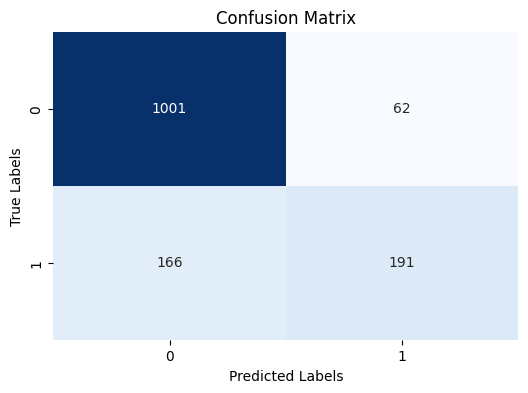


Class-wise Accuracy:
Class 0: 1001/1063 (94.17%)
Class 1: 191/357 (53.50%)

Precision-Recall Curve:


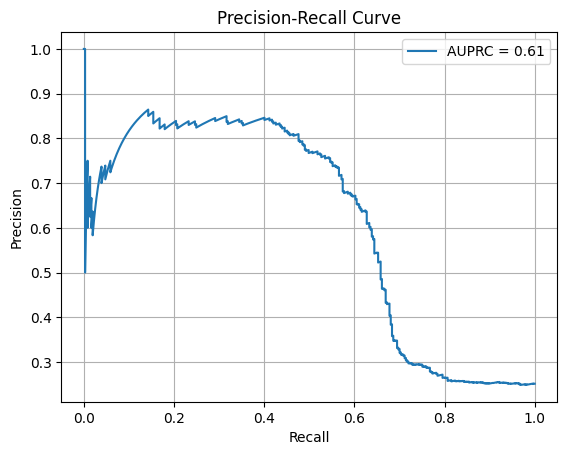


ROC Curve:


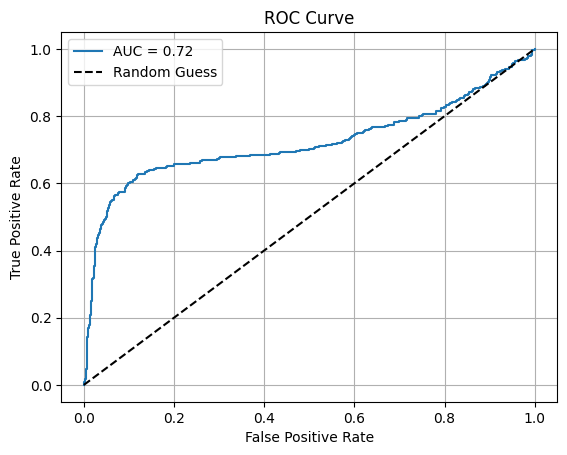


Mean F1 Score: 0.7620
Balanced Accuracy: 0.7383
Average AUPRC: 0.6108

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1063
           1       0.75      0.54      0.63       357

    accuracy                           0.84      1420
   macro avg       0.81      0.74      0.76      1420
weighted avg       0.83      0.84      0.83      1420

Fold No: 2
Epoch [1/100], Loss: 0.8125, Accuracy: 0.4984
Validation Loss: 0.6600, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6998, Accuracy: 0.5234
Validation Loss: 0.6404, Validation Accuracy: 0.4919
Epoch [3/100], Loss: 0.6754, Accuracy: 0.6067
Validation Loss: 0.7985, Validation Accuracy: 0.5536
Epoch [4/100], Loss: 0.6623, Accuracy: 0.6441
Validation Loss: 0.6201, Validation Accuracy: 0.7412
Epoch [5/100], Loss: 0.6151, Accuracy: 0.7341
Validation Loss: 0.6505, Validation Accuracy: 0.7474
Epoch [6/100], Loss: 0.6005, Accuracy: 0.7706
Validation Loss: 0.6045, V

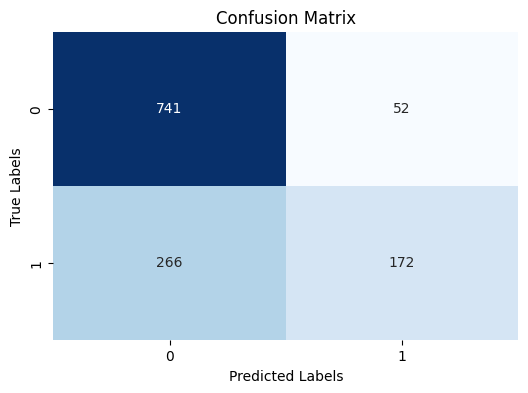


Class-wise Accuracy:
Class 0: 741/793 (93.44%)
Class 1: 172/438 (39.27%)

Precision-Recall Curve:


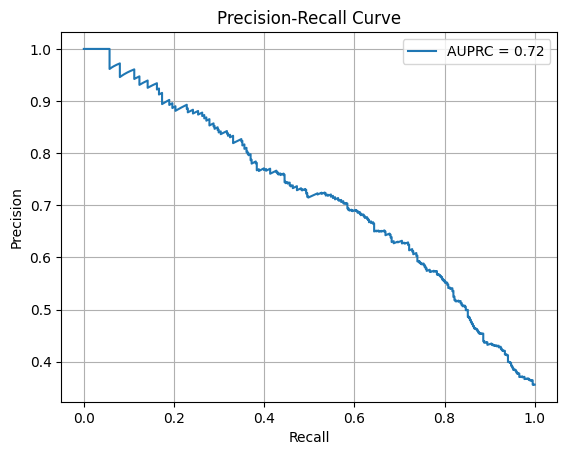


ROC Curve:


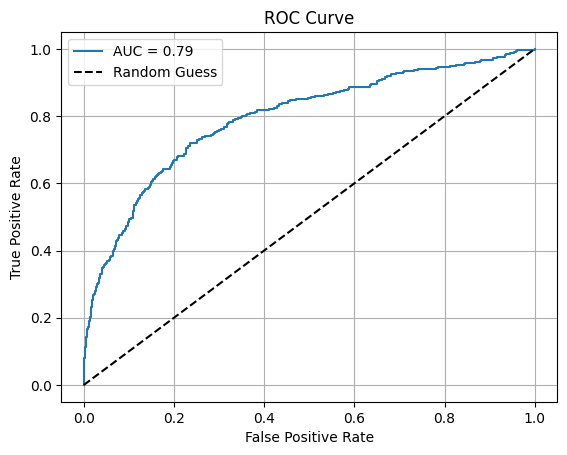


Mean F1 Score: 0.6715
Balanced Accuracy: 0.6636
Average AUPRC: 0.7189

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       793
           1       0.77      0.39      0.52       438

    accuracy                           0.74      1231
   macro avg       0.75      0.66      0.67      1231
weighted avg       0.75      0.74      0.72      1231

Fold No: 3
Epoch [1/100], Loss: 0.7034, Accuracy: 0.5695
Validation Loss: 0.6558, Validation Accuracy: 0.7070
Epoch [2/100], Loss: 0.6426, Accuracy: 0.6787
Validation Loss: 0.6430, Validation Accuracy: 0.7161
Epoch [3/100], Loss: 0.6255, Accuracy: 0.7214
Validation Loss: 0.6304, Validation Accuracy: 0.6719
Epoch [4/100], Loss: 0.5976, Accuracy: 0.7734
Validation Loss: 0.6203, Validation Accuracy: 0.6984
Epoch [5/100], Loss: 0.5638, Accuracy: 0.8239
Validation Loss: 0.6302, Validation Accuracy: 0.6823
Epoch [6/100], Loss: 0.5733, Accuracy: 0.8126
Validation Loss: 0.6542, V

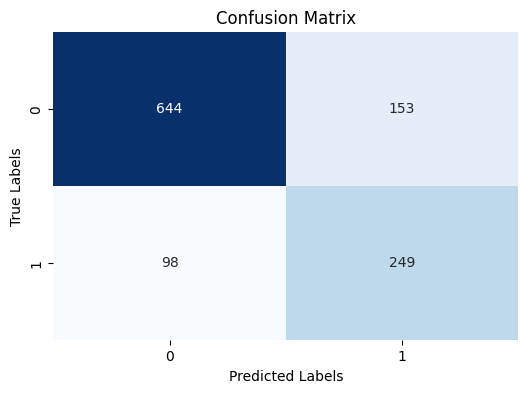


Class-wise Accuracy:
Class 0: 644/797 (80.80%)
Class 1: 249/347 (71.76%)

Precision-Recall Curve:


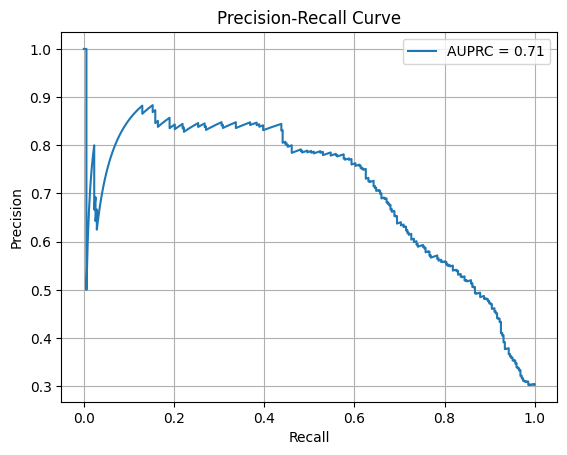


ROC Curve:


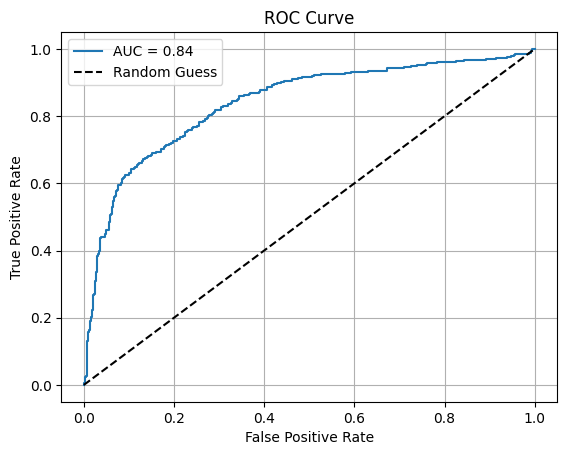


Mean F1 Score: 0.7509
Balanced Accuracy: 0.7628
Average AUPRC: 0.7086

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       797
           1       0.62      0.72      0.66       347

    accuracy                           0.78      1144
   macro avg       0.74      0.76      0.75      1144
weighted avg       0.79      0.78      0.78      1144

Fold No: 4
Epoch [1/100], Loss: 0.7358, Accuracy: 0.5102
Validation Loss: 0.6610, Validation Accuracy: 0.5335
Epoch [2/100], Loss: 0.6818, Accuracy: 0.5810
Validation Loss: 0.7061, Validation Accuracy: 0.6754
Epoch [3/100], Loss: 0.6570, Accuracy: 0.6574
Validation Loss: 0.6119, Validation Accuracy: 0.7051
Epoch [4/100], Loss: 0.6214, Accuracy: 0.7374
Validation Loss: 0.6278, Validation Accuracy: 0.6748
Epoch [5/100], Loss: 0.5964, Accuracy: 0.7761
Validation Loss: 0.6029, Validation Accuracy: 0.7313
Epoch [6/100], Loss: 0.5654, Accuracy: 0.8310
Validation Loss: 0.6019, V

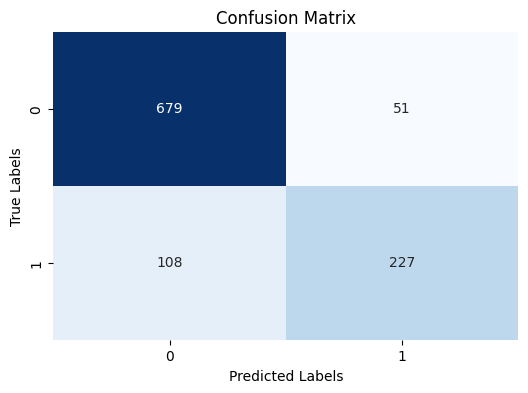


Class-wise Accuracy:
Class 0: 679/730 (93.01%)
Class 1: 227/335 (67.76%)

Precision-Recall Curve:


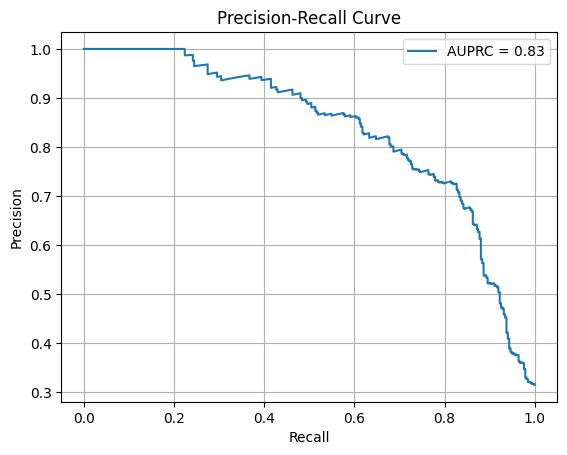


ROC Curve:


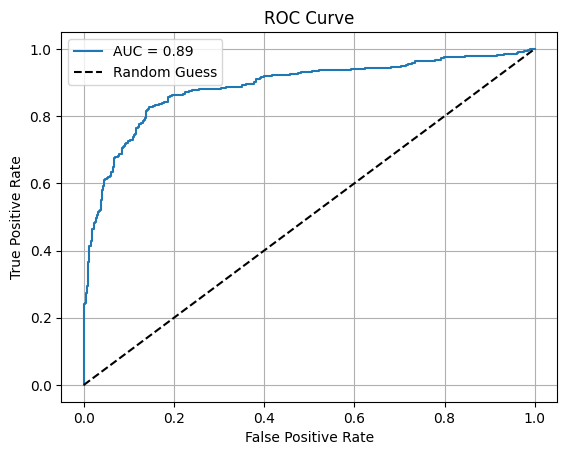


Mean F1 Score: 0.8179
Balanced Accuracy: 0.8039
Average AUPRC: 0.8342

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       730
           1       0.82      0.68      0.74       335

    accuracy                           0.85      1065
   macro avg       0.84      0.80      0.82      1065
weighted avg       0.85      0.85      0.85      1065

Fold No: 5
Epoch [1/100], Loss: 0.7478, Accuracy: 0.5175
Validation Loss: 0.7506, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6945, Accuracy: 0.5455
Validation Loss: 0.6342, Validation Accuracy: 0.5797
Epoch [3/100], Loss: 0.6534, Accuracy: 0.6598
Validation Loss: 0.6196, Validation Accuracy: 0.7396
Epoch [4/100], Loss: 0.6195, Accuracy: 0.7334
Validation Loss: 0.5822, Validation Accuracy: 0.6520
Epoch [5/100], Loss: 0.5950, Accuracy: 0.7658
Validation Loss: 0.5780, Validation Accuracy: 0.8005
Epoch [6/100], Loss: 0.5906, Accuracy: 0.7890
Validation Loss: 0.5827, V

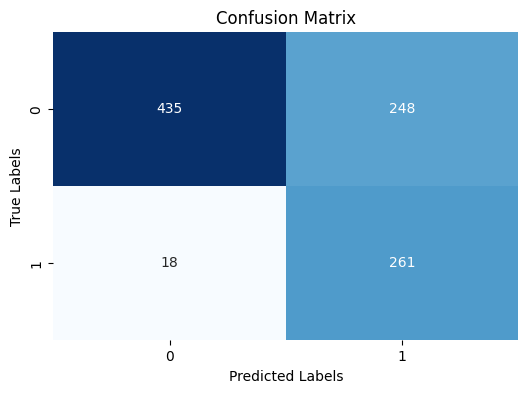


Class-wise Accuracy:
Class 0: 435/683 (63.69%)
Class 1: 261/279 (93.55%)

Precision-Recall Curve:


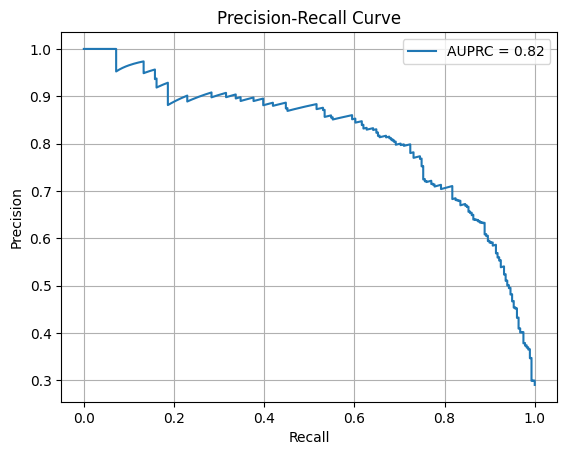


ROC Curve:


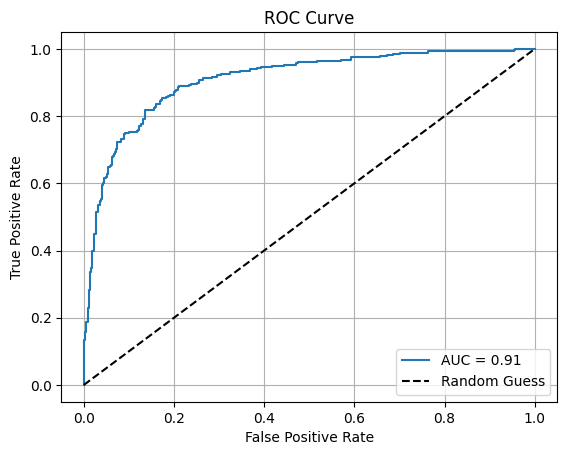


Mean F1 Score: 0.7141
Balanced Accuracy: 0.7862
Average AUPRC: 0.8168

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77       683
           1       0.51      0.94      0.66       279

    accuracy                           0.72       962
   macro avg       0.74      0.79      0.71       962
weighted avg       0.83      0.72      0.74       962


RESULTS FOR PARAMETER SET 1:
Balanced Accuracy for each fold: ['0.7383', '0.6636', '0.7628', '0.8039', '0.7862']
Average Balanced Accuracy across all folds: 0.7510
Best fold (Fold 4) class-wise accuracy: ['0.9301', '0.6776']
AUPRC for each fold: ['0.6108', '0.7189', '0.7086', '0.8342', '0.8168']
Average AUPRC across all folds: 0.7379

PARAMETER SET 2
Parameters: {'ff_dim': 32, 'dropout_rate': 0.41853152648379743, 'embed_dim': 1024, 'learning_rate': 3.625518171447465e-07, 'weight_decay': 2.2825359494028837e-05, 'batch_size': 10, 'num_heads': 8, 'num_transformer_blocks': 1

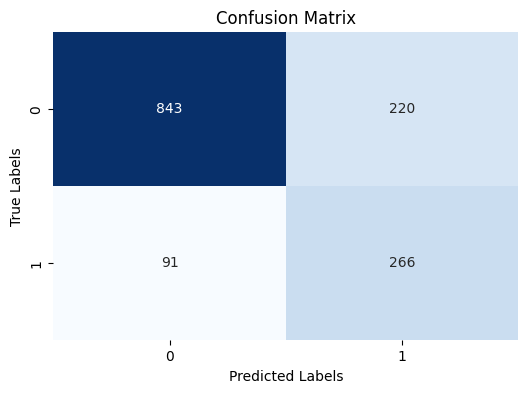


Class-wise Accuracy:
Class 0: 843/1063 (79.30%)
Class 1: 266/357 (74.51%)

Precision-Recall Curve:


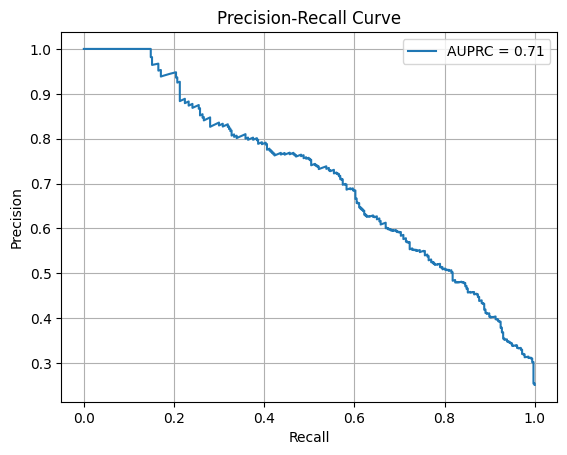


ROC Curve:


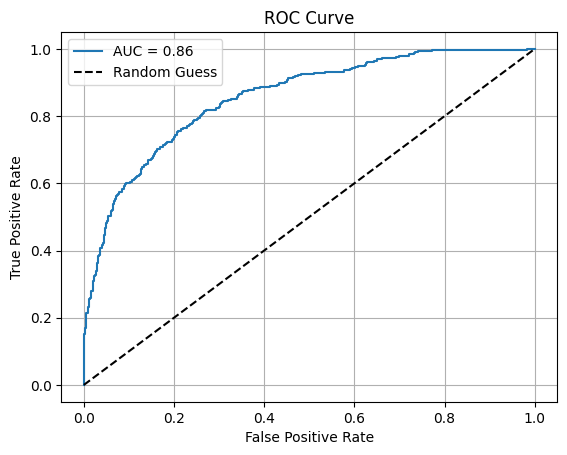


Mean F1 Score: 0.7377
Balanced Accuracy: 0.7691
Average AUPRC: 0.7120

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1063
           1       0.55      0.75      0.63       357

    accuracy                           0.78      1420
   macro avg       0.72      0.77      0.74      1420
weighted avg       0.81      0.78      0.79      1420

Fold No: 2
Epoch [1/100], Loss: 0.7026, Accuracy: 0.5411
Validation Loss: 0.7079, Validation Accuracy: 0.5962
Epoch [2/100], Loss: 0.6799, Accuracy: 0.6093
Validation Loss: 0.7012, Validation Accuracy: 0.6062
Epoch [3/100], Loss: 0.6563, Accuracy: 0.6519
Validation Loss: 0.6614, Validation Accuracy: 0.6289
Epoch [4/100], Loss: 0.6501, Accuracy: 0.6727
Validation Loss: 0.6585, Validation Accuracy: 0.6545
Epoch [5/100], Loss: 0.6405, Accuracy: 0.6878
Validation Loss: 0.6575, Validation Accuracy: 0.6825
Epoch [6/100], Loss: 0.6296, Accuracy: 0.6993
Validation Loss: 0.6286, V

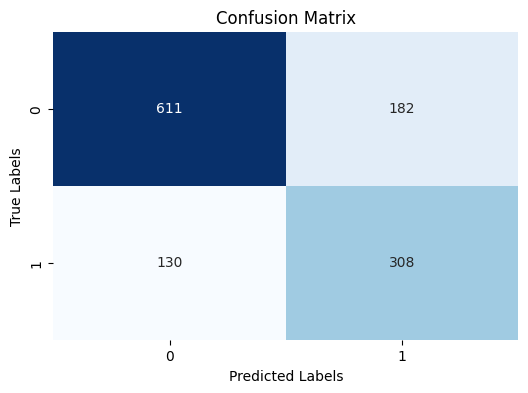


Class-wise Accuracy:
Class 0: 611/793 (77.05%)
Class 1: 308/438 (70.32%)

Precision-Recall Curve:


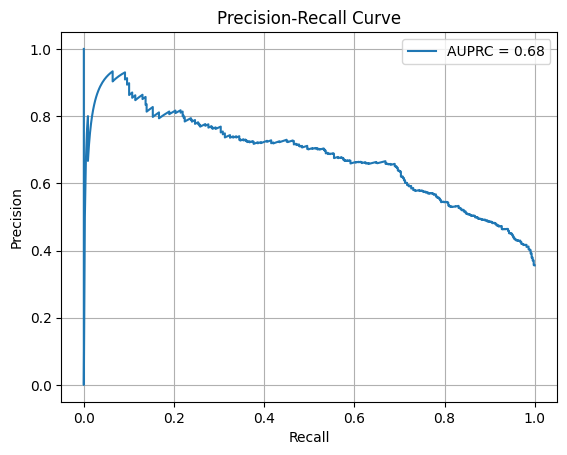


ROC Curve:


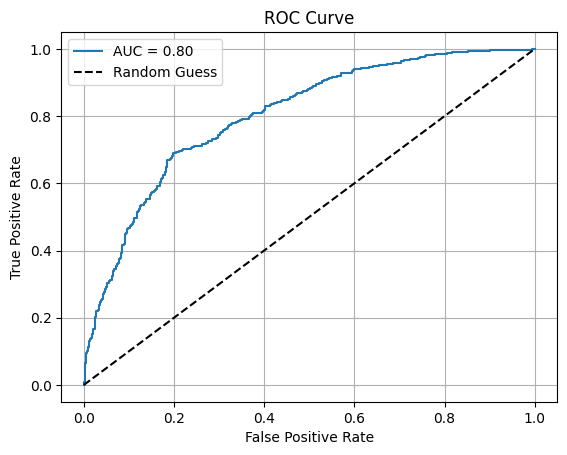


Mean F1 Score: 0.7302
Balanced Accuracy: 0.7368
Average AUPRC: 0.6800

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       793
           1       0.63      0.70      0.66       438

    accuracy                           0.75      1231
   macro avg       0.73      0.74      0.73      1231
weighted avg       0.75      0.75      0.75      1231

Fold No: 3
Epoch [1/100], Loss: 0.6854, Accuracy: 0.5875
Validation Loss: 0.6882, Validation Accuracy: 0.6161
Epoch [2/100], Loss: 0.6596, Accuracy: 0.6509
Validation Loss: 0.6522, Validation Accuracy: 0.6592
Epoch [3/100], Loss: 0.6375, Accuracy: 0.7152
Validation Loss: 0.6573, Validation Accuracy: 0.6874
Epoch [4/100], Loss: 0.6211, Accuracy: 0.7425
Validation Loss: 0.6652, Validation Accuracy: 0.6740
Epoch [5/100], Loss: 0.6152, Accuracy: 0.7425
Validation Loss: 0.6266, Validation Accuracy: 0.6599
Epoch [6/100], Loss: 0.6115, Accuracy: 0.7616
Validation Loss: 0.6321, V

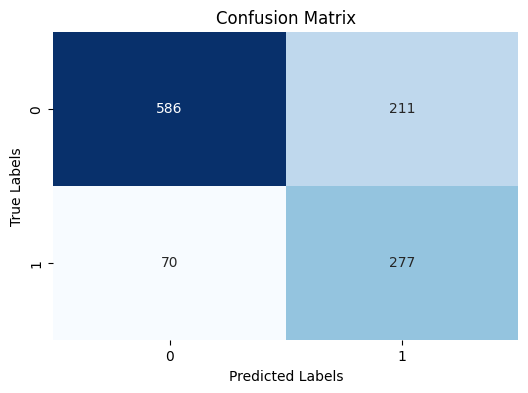


Class-wise Accuracy:
Class 0: 586/797 (73.53%)
Class 1: 277/347 (79.83%)

Precision-Recall Curve:


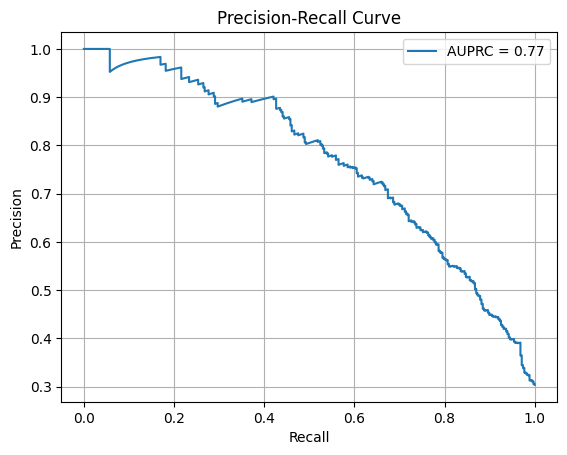


ROC Curve:


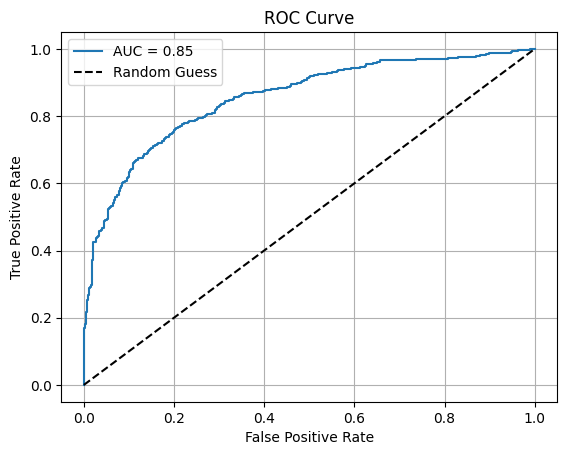


Mean F1 Score: 0.7350
Balanced Accuracy: 0.7668
Average AUPRC: 0.7662

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       797
           1       0.57      0.80      0.66       347

    accuracy                           0.75      1144
   macro avg       0.73      0.77      0.74      1144
weighted avg       0.79      0.75      0.76      1144

Fold No: 4
Epoch [1/100], Loss: 0.6906, Accuracy: 0.5582
Validation Loss: 0.6491, Validation Accuracy: 0.6521
Epoch [2/100], Loss: 0.6680, Accuracy: 0.6355
Validation Loss: 0.6356, Validation Accuracy: 0.6736
Epoch [3/100], Loss: 0.6497, Accuracy: 0.6830
Validation Loss: 0.6296, Validation Accuracy: 0.6829
Epoch [4/100], Loss: 0.6439, Accuracy: 0.6965
Validation Loss: 0.6421, Validation Accuracy: 0.6918
Epoch [5/100], Loss: 0.6340, Accuracy: 0.7081
Validation Loss: 0.6123, Validation Accuracy: 0.7021
Epoch [6/100], Loss: 0.6282, Accuracy: 0.7291
Validation Loss: 0.6428, V

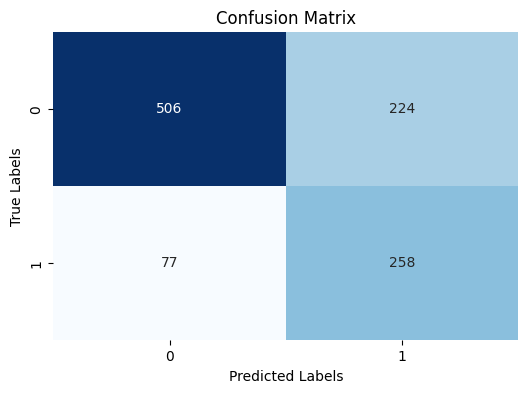


Class-wise Accuracy:
Class 0: 506/730 (69.32%)
Class 1: 258/335 (77.01%)

Precision-Recall Curve:


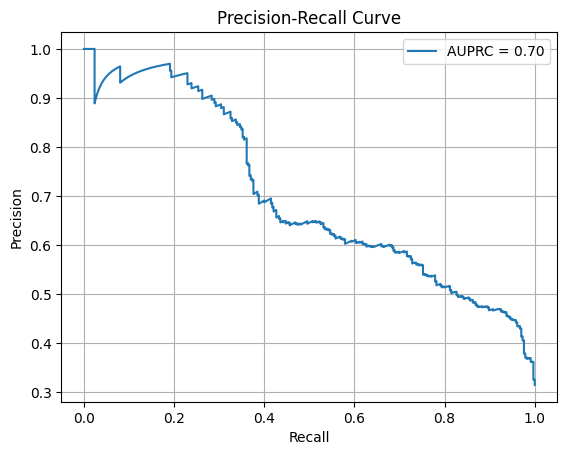


ROC Curve:


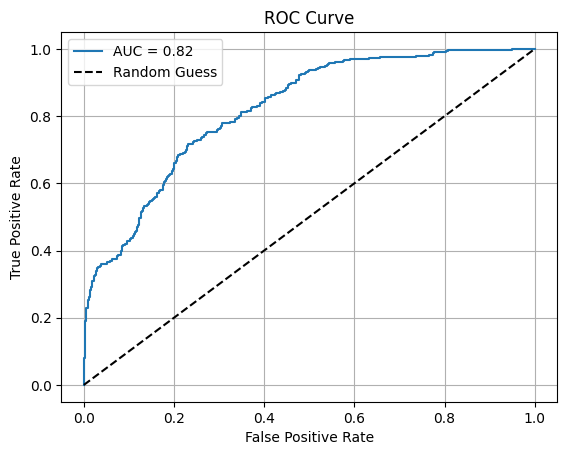


Mean F1 Score: 0.7012
Balanced Accuracy: 0.7316
Average AUPRC: 0.6988

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       730
           1       0.54      0.77      0.63       335

    accuracy                           0.72      1065
   macro avg       0.70      0.73      0.70      1065
weighted avg       0.76      0.72      0.73      1065

Fold No: 5
Epoch [1/100], Loss: 0.6787, Accuracy: 0.6007
Validation Loss: 0.6582, Validation Accuracy: 0.6333
Epoch [2/100], Loss: 0.6593, Accuracy: 0.6462
Validation Loss: 0.6836, Validation Accuracy: 0.6387
Epoch [3/100], Loss: 0.6516, Accuracy: 0.6668
Validation Loss: 0.6561, Validation Accuracy: 0.6526
Epoch [4/100], Loss: 0.6470, Accuracy: 0.6852
Validation Loss: 0.6301, Validation Accuracy: 0.6511
Epoch [5/100], Loss: 0.6409, Accuracy: 0.7010
Validation Loss: 0.6557, Validation Accuracy: 0.6806
Epoch [6/100], Loss: 0.6350, Accuracy: 0.7032
Validation Loss: 0.6443, V

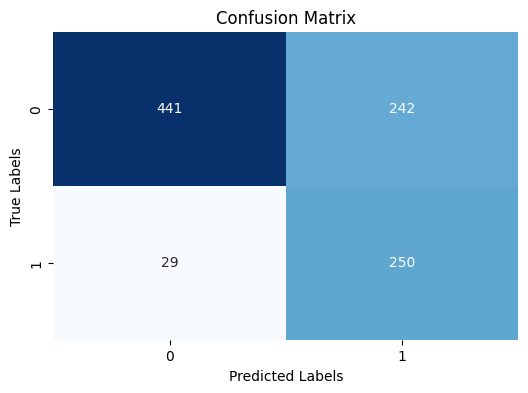


Class-wise Accuracy:
Class 0: 441/683 (64.57%)
Class 1: 250/279 (89.61%)

Precision-Recall Curve:


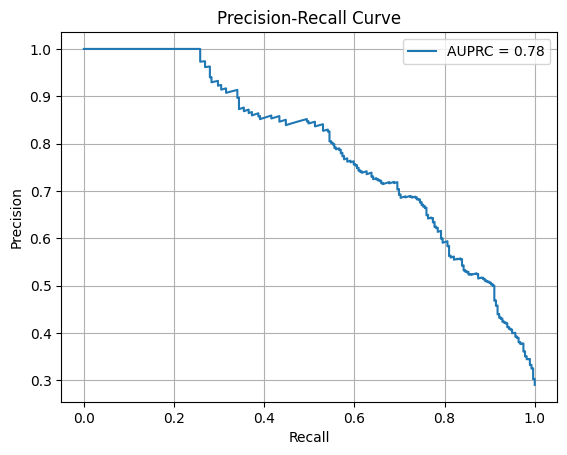


ROC Curve:


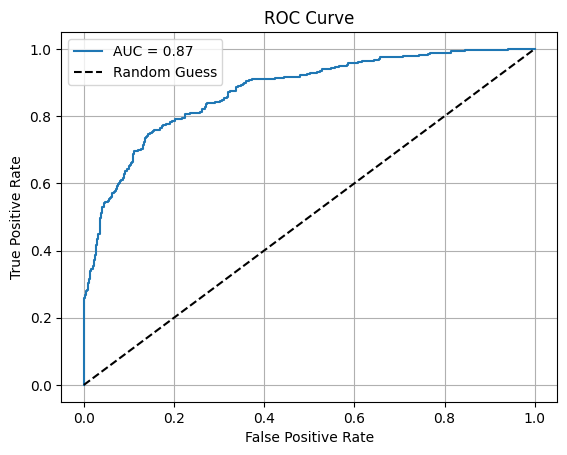


Mean F1 Score: 0.7067
Balanced Accuracy: 0.7709
Average AUPRC: 0.7848

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.65      0.76       683
           1       0.51      0.90      0.65       279

    accuracy                           0.72       962
   macro avg       0.72      0.77      0.71       962
weighted avg       0.81      0.72      0.73       962


RESULTS FOR PARAMETER SET 2:
Balanced Accuracy for each fold: ['0.7691', '0.7368', '0.7668', '0.7316', '0.7709']
Average Balanced Accuracy across all folds: 0.7550
Best fold (Fold 5) class-wise accuracy: ['0.6457', '0.8961']
AUPRC for each fold: ['0.7120', '0.6800', '0.7662', '0.6988', '0.7848']
Average AUPRC across all folds: 0.7284

PARAMETER SET 3
Parameters: {'ff_dim': 32, 'dropout_rate': 0.18991275507279126, 'embed_dim': 1024, 'learning_rate': 3.4398216475610645e-07, 'weight_decay': 4.3924727014694645e-06, 'batch_size': 10, 'num_heads': 8, 'num_transformer_blocks': 

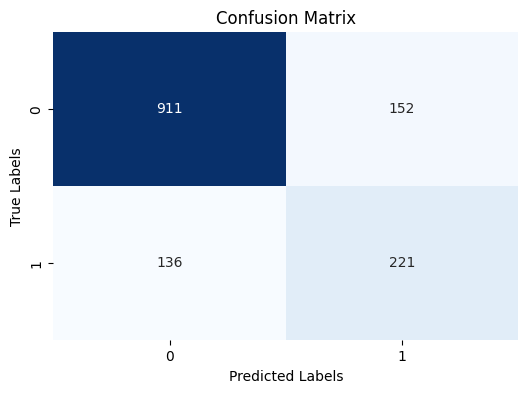


Class-wise Accuracy:
Class 0: 911/1063 (85.70%)
Class 1: 221/357 (61.90%)

Precision-Recall Curve:


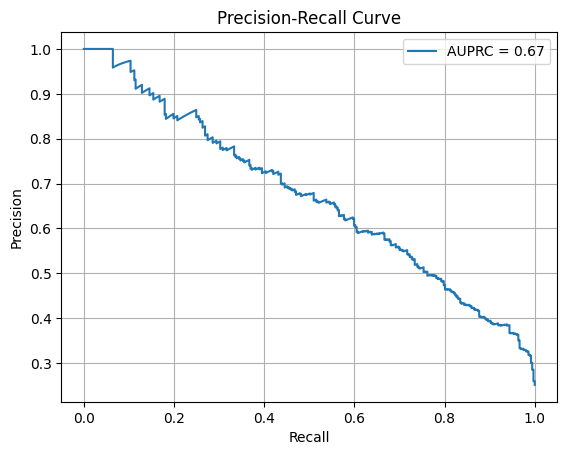


ROC Curve:


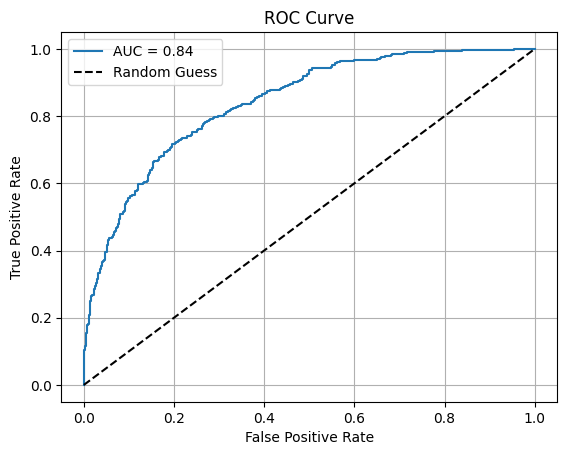


Mean F1 Score: 0.7345
Balanced Accuracy: 0.7380
Average AUPRC: 0.6707

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1063
           1       0.59      0.62      0.61       357

    accuracy                           0.80      1420
   macro avg       0.73      0.74      0.73      1420
weighted avg       0.80      0.80      0.80      1420

Fold No: 2
Epoch [1/100], Loss: 0.6820, Accuracy: 0.5963
Validation Loss: 0.6530, Validation Accuracy: 0.6582
Epoch [2/100], Loss: 0.6663, Accuracy: 0.6394
Validation Loss: 0.6619, Validation Accuracy: 0.6640
Epoch [3/100], Loss: 0.6539, Accuracy: 0.6649
Validation Loss: 0.6260, Validation Accuracy: 0.6571
Epoch [4/100], Loss: 0.6407, Accuracy: 0.6982
Validation Loss: 0.6319, Validation Accuracy: 0.7026
Epoch [5/100], Loss: 0.6325, Accuracy: 0.7144
Validation Loss: 0.6373, Validation Accuracy: 0.7327
Epoch [6/100], Loss: 0.6305, Accuracy: 0.7128
Validation Loss: 0.6095, V

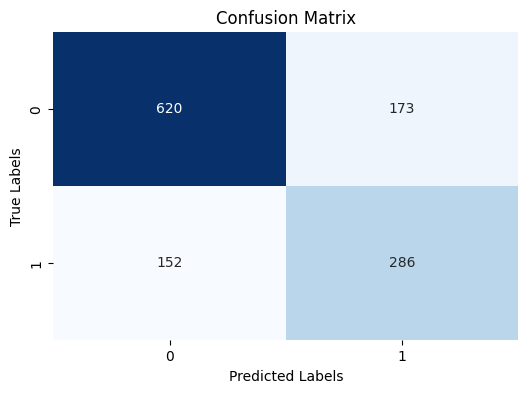


Class-wise Accuracy:
Class 0: 620/793 (78.18%)
Class 1: 286/438 (65.30%)

Precision-Recall Curve:


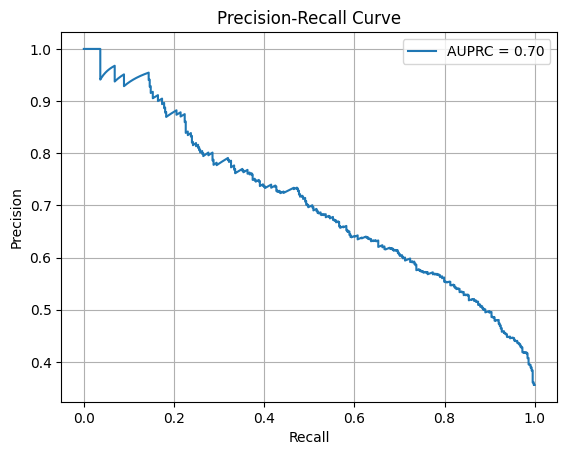


ROC Curve:


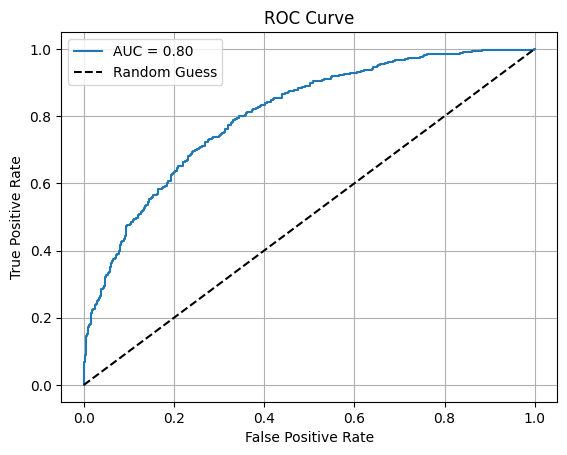


Mean F1 Score: 0.7150
Balanced Accuracy: 0.7174
Average AUPRC: 0.7049

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       793
           1       0.62      0.65      0.64       438

    accuracy                           0.74      1231
   macro avg       0.71      0.72      0.72      1231
weighted avg       0.74      0.74      0.74      1231

Fold No: 3
Epoch [1/100], Loss: 0.7066, Accuracy: 0.5247
Validation Loss: 0.6948, Validation Accuracy: 0.5879
Epoch [2/100], Loss: 0.6725, Accuracy: 0.6174
Validation Loss: 0.6754, Validation Accuracy: 0.6420
Epoch [3/100], Loss: 0.6636, Accuracy: 0.6365
Validation Loss: 0.6458, Validation Accuracy: 0.6374
Epoch [4/100], Loss: 0.6543, Accuracy: 0.6777
Validation Loss: 0.6513, Validation Accuracy: 0.6836
Epoch [5/100], Loss: 0.6411, Accuracy: 0.6946
Validation Loss: 0.6388, Validation Accuracy: 0.6816
Epoch [6/100], Loss: 0.6334, Accuracy: 0.7060
Validation Loss: 0.6512, V

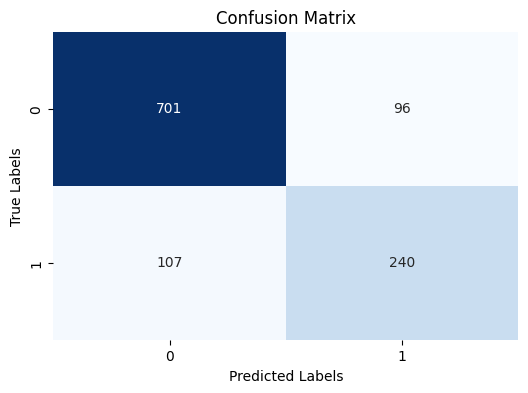


Class-wise Accuracy:
Class 0: 701/797 (87.95%)
Class 1: 240/347 (69.16%)

Precision-Recall Curve:


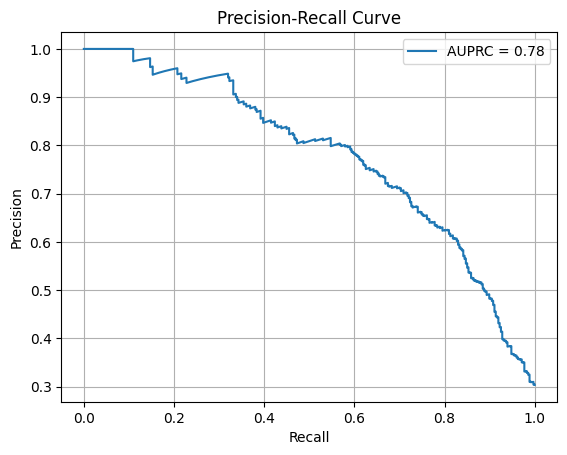


ROC Curve:


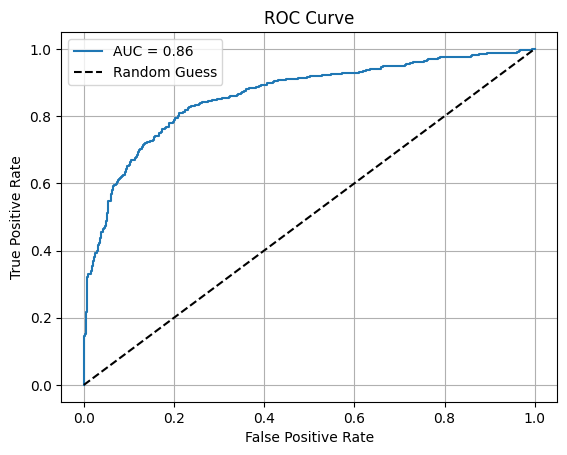


Mean F1 Score: 0.7882
Balanced Accuracy: 0.7856
Average AUPRC: 0.7785

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       797
           1       0.71      0.69      0.70       347

    accuracy                           0.82      1144
   macro avg       0.79      0.79      0.79      1144
weighted avg       0.82      0.82      0.82      1144

Fold No: 4
Epoch [1/100], Loss: 0.6939, Accuracy: 0.5703
Validation Loss: 0.6543, Validation Accuracy: 0.6381
Epoch [2/100], Loss: 0.6664, Accuracy: 0.6206
Validation Loss: 0.6502, Validation Accuracy: 0.6736
Epoch [3/100], Loss: 0.6517, Accuracy: 0.6629
Validation Loss: 0.6894, Validation Accuracy: 0.6543
Epoch [4/100], Loss: 0.6379, Accuracy: 0.7062
Validation Loss: 0.6313, Validation Accuracy: 0.7143
Epoch [5/100], Loss: 0.6270, Accuracy: 0.7295
Validation Loss: 0.6351, Validation Accuracy: 0.7249
Epoch [6/100], Loss: 0.6182, Accuracy: 0.7384
Validation Loss: 0.6309, V

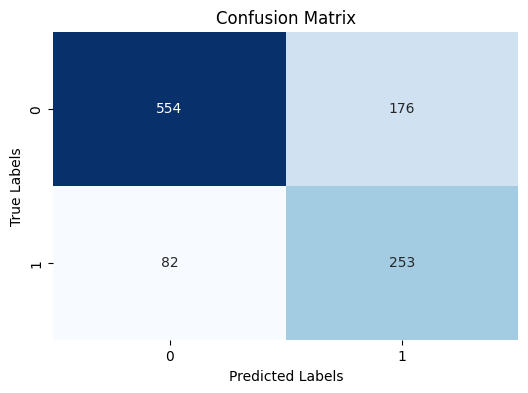


Class-wise Accuracy:
Class 0: 554/730 (75.89%)
Class 1: 253/335 (75.52%)

Precision-Recall Curve:


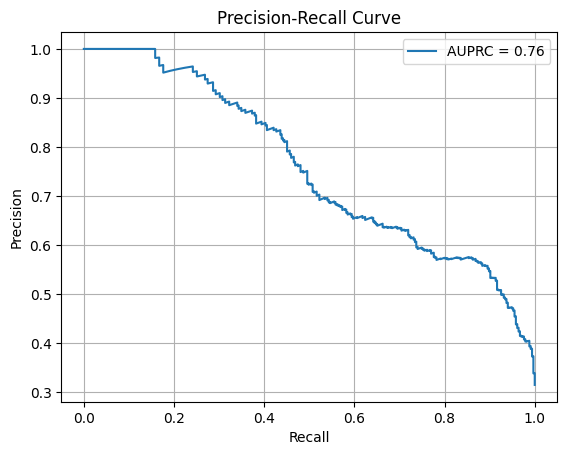


ROC Curve:


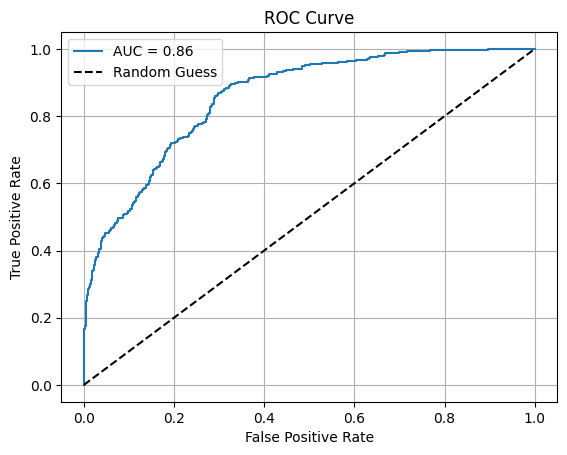


Mean F1 Score: 0.7367
Balanced Accuracy: 0.7571
Average AUPRC: 0.7563

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       730
           1       0.59      0.76      0.66       335

    accuracy                           0.76      1065
   macro avg       0.73      0.76      0.74      1065
weighted avg       0.78      0.76      0.76      1065

Fold No: 5
Epoch [1/100], Loss: 0.6896, Accuracy: 0.5757
Validation Loss: 0.6681, Validation Accuracy: 0.6607
Epoch [2/100], Loss: 0.6605, Accuracy: 0.6506
Validation Loss: 0.6801, Validation Accuracy: 0.6446
Epoch [3/100], Loss: 0.6489, Accuracy: 0.6808
Validation Loss: 0.6321, Validation Accuracy: 0.6753
Epoch [4/100], Loss: 0.6380, Accuracy: 0.7110
Validation Loss: 0.6629, Validation Accuracy: 0.6726
Epoch [5/100], Loss: 0.6354, Accuracy: 0.7106
Validation Loss: 0.6456, Validation Accuracy: 0.6875
Epoch [6/100], Loss: 0.6244, Accuracy: 0.7250
Validation Loss: 0.6471, V

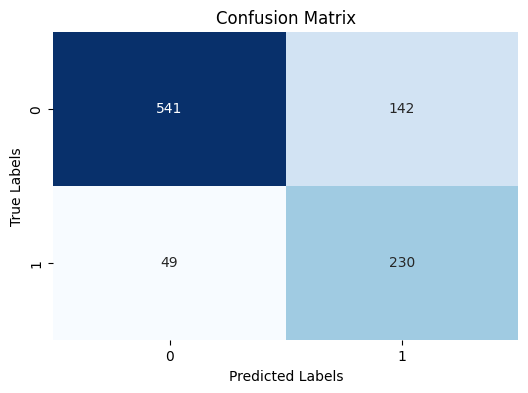


Class-wise Accuracy:
Class 0: 541/683 (79.21%)
Class 1: 230/279 (82.44%)

Precision-Recall Curve:


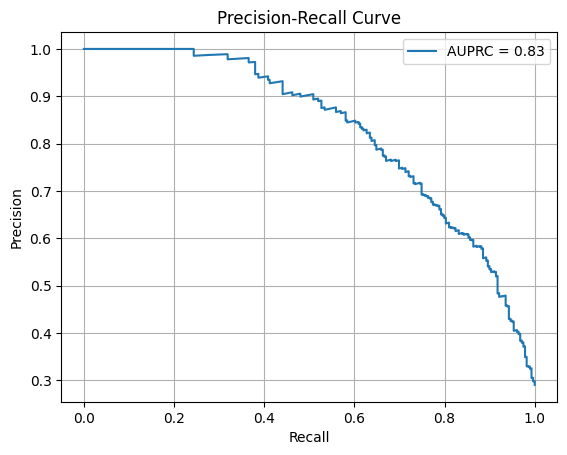


ROC Curve:


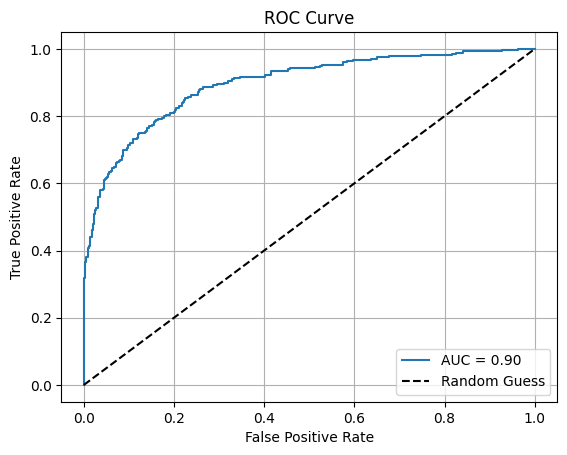


Mean F1 Score: 0.7783
Balanced Accuracy: 0.8082
Average AUPRC: 0.8278

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       683
           1       0.62      0.82      0.71       279

    accuracy                           0.80       962
   macro avg       0.77      0.81      0.78       962
weighted avg       0.83      0.80      0.81       962


RESULTS FOR PARAMETER SET 3:
Balanced Accuracy for each fold: ['0.7380', '0.7174', '0.7856', '0.7571', '0.8082']
Average Balanced Accuracy across all folds: 0.7613
Best fold (Fold 5) class-wise accuracy: ['0.7921', '0.8244']
AUPRC for each fold: ['0.6707', '0.7049', '0.7785', '0.7563', '0.8278']
Average AUPRC across all folds: 0.7476

PARAMETER SET 4
Parameters: {'ff_dim': 32, 'dropout_rate': 0.4420138205390315, 'embed_dim': 512, 'learning_rate': 1.0832884746780947e-05, 'weight_decay': 3.9571476864810075e-05, 'batch_size': 32, 'num_heads': 8, 'num_transformer_blocks': 1}

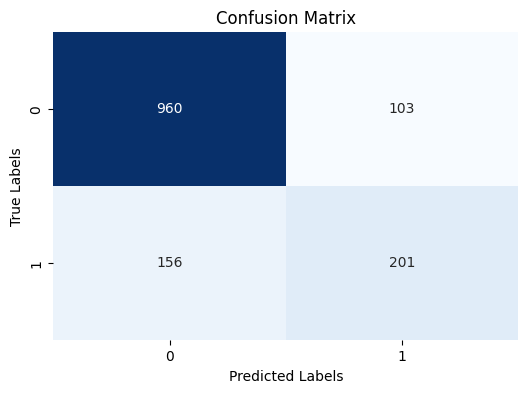


Class-wise Accuracy:
Class 0: 960/1063 (90.31%)
Class 1: 201/357 (56.30%)

Precision-Recall Curve:


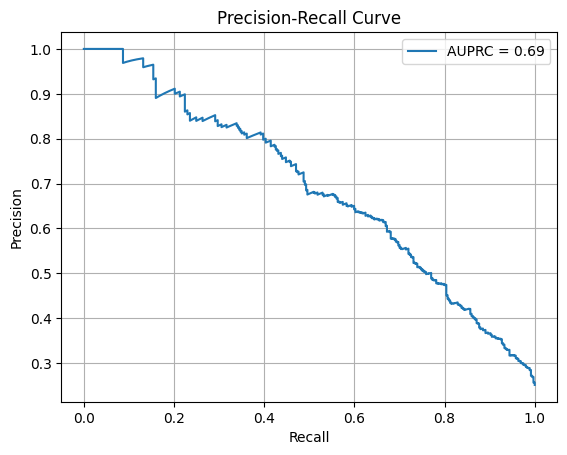


ROC Curve:


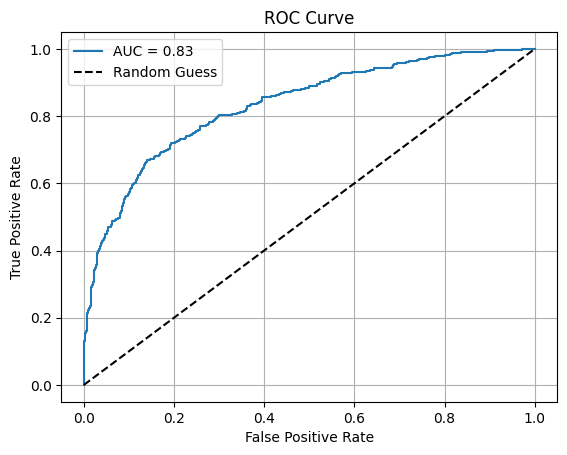


Mean F1 Score: 0.7447
Balanced Accuracy: 0.7331
Average AUPRC: 0.6891

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1063
           1       0.66      0.56      0.61       357

    accuracy                           0.82      1420
   macro avg       0.76      0.73      0.74      1420
weighted avg       0.81      0.82      0.81      1420

Fold No: 2
Epoch [1/100], Loss: 0.6733, Accuracy: 0.6233
Validation Loss: 0.6489, Validation Accuracy: 0.7242
Epoch [2/100], Loss: 0.6402, Accuracy: 0.6878
Validation Loss: 0.6525, Validation Accuracy: 0.7334
Epoch [3/100], Loss: 0.6247, Accuracy: 0.7211
Validation Loss: 0.6005, Validation Accuracy: 0.7287
Epoch [4/100], Loss: 0.6215, Accuracy: 0.7341
Validation Loss: 0.5867, Validation Accuracy: 0.7316
Epoch [5/100], Loss: 0.6006, Accuracy: 0.7737
Validation Loss: 0.6403, Validation Accuracy: 0.7474
Epoch [6/100], Loss: 0.6017, Accuracy: 0.7648
Validation Loss: 0.5803, V

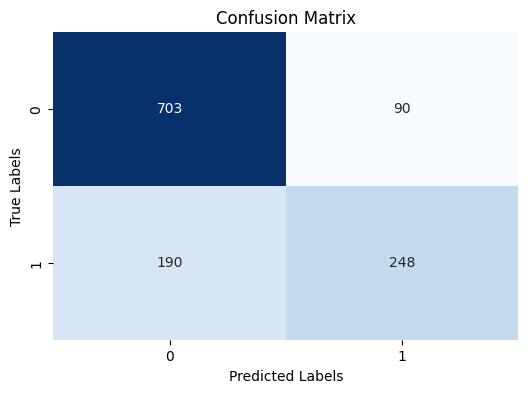


Class-wise Accuracy:
Class 0: 703/793 (88.65%)
Class 1: 248/438 (56.62%)

Precision-Recall Curve:


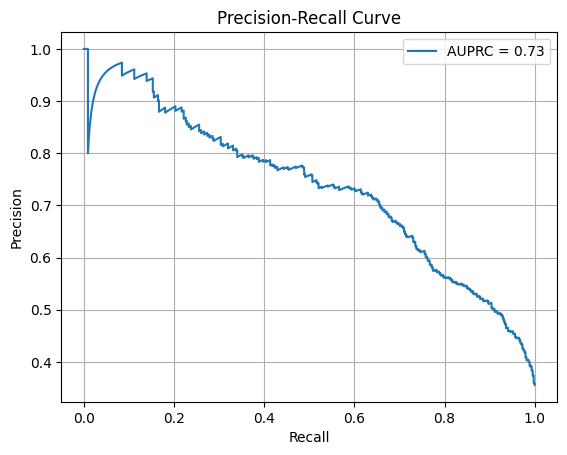


ROC Curve:


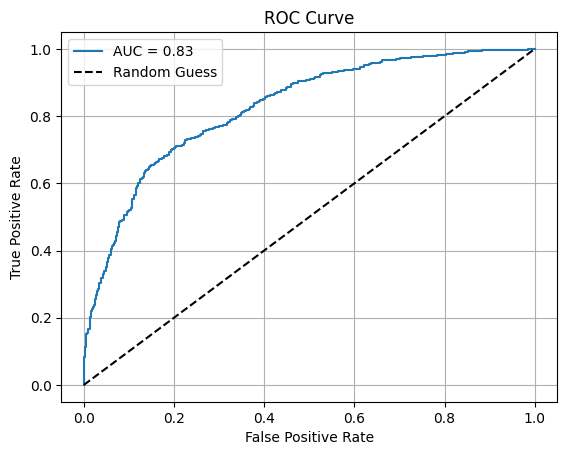


Mean F1 Score: 0.7366
Balanced Accuracy: 0.7264
Average AUPRC: 0.7335

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       793
           1       0.73      0.57      0.64       438

    accuracy                           0.77      1231
   macro avg       0.76      0.73      0.74      1231
weighted avg       0.77      0.77      0.76      1231

Fold No: 3
Epoch [1/100], Loss: 0.6821, Accuracy: 0.6231
Validation Loss: 0.6485, Validation Accuracy: 0.6993
Epoch [2/100], Loss: 0.6192, Accuracy: 0.7430
Validation Loss: 0.6237, Validation Accuracy: 0.6637
Epoch [3/100], Loss: 0.5928, Accuracy: 0.7729
Validation Loss: 0.6143, Validation Accuracy: 0.7145
Epoch [4/100], Loss: 0.5909, Accuracy: 0.7801
Validation Loss: 0.6681, Validation Accuracy: 0.6917
Epoch [5/100], Loss: 0.5709, Accuracy: 0.8239
Validation Loss: 0.6115, Validation Accuracy: 0.7210
Epoch [6/100], Loss: 0.5623, Accuracy: 0.8301
Validation Loss: 0.6427, V

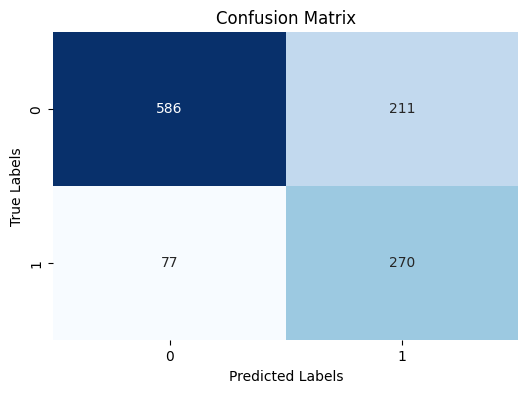


Class-wise Accuracy:
Class 0: 586/797 (73.53%)
Class 1: 270/347 (77.81%)

Precision-Recall Curve:


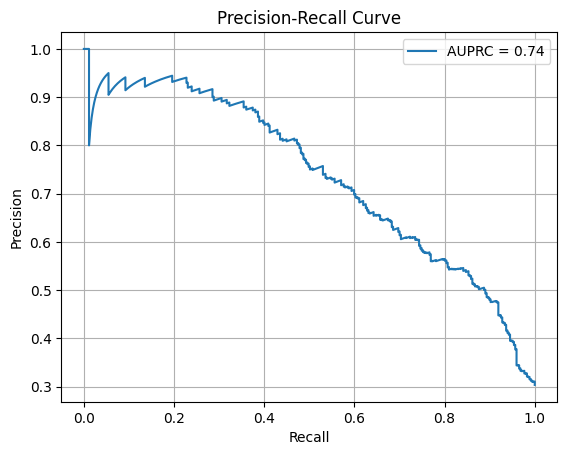


ROC Curve:


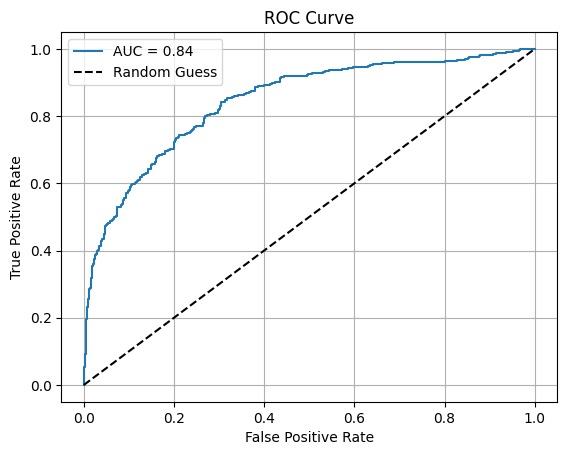


Mean F1 Score: 0.7275
Balanced Accuracy: 0.7567
Average AUPRC: 0.7361

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       797
           1       0.56      0.78      0.65       347

    accuracy                           0.75      1144
   macro avg       0.72      0.76      0.73      1144
weighted avg       0.79      0.75      0.76      1144

Fold No: 4
Epoch [1/100], Loss: 0.6803, Accuracy: 0.6290
Validation Loss: 0.6198, Validation Accuracy: 0.7066
Epoch [2/100], Loss: 0.6300, Accuracy: 0.7095
Validation Loss: 0.6740, Validation Accuracy: 0.7010
Epoch [3/100], Loss: 0.5924, Accuracy: 0.7817
Validation Loss: 0.6139, Validation Accuracy: 0.7392
Epoch [4/100], Loss: 0.5755, Accuracy: 0.8119
Validation Loss: 0.6172, Validation Accuracy: 0.7541
Epoch [5/100], Loss: 0.5682, Accuracy: 0.8287
Validation Loss: 0.5995, Validation Accuracy: 0.7297
Epoch [6/100], Loss: 0.5524, Accuracy: 0.8520
Validation Loss: 0.5947, V

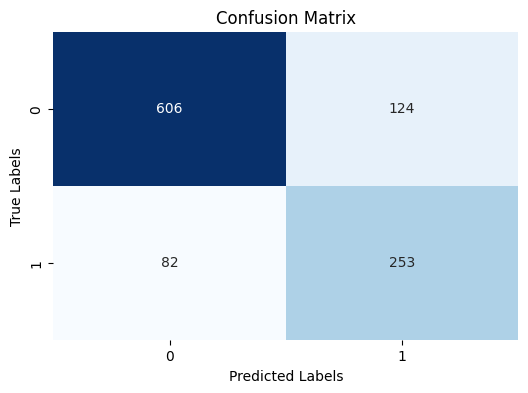


Class-wise Accuracy:
Class 0: 606/730 (83.01%)
Class 1: 253/335 (75.52%)

Precision-Recall Curve:


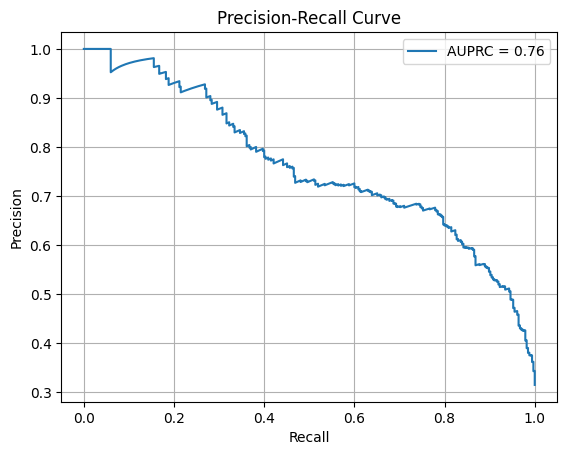


ROC Curve:


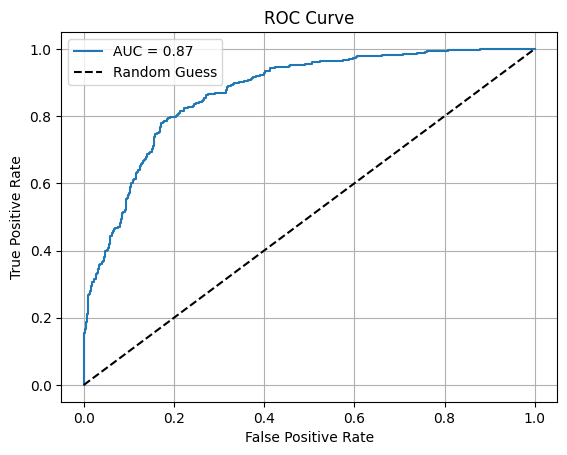


Mean F1 Score: 0.7827
Balanced Accuracy: 0.7927
Average AUPRC: 0.7607

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       730
           1       0.67      0.76      0.71       335

    accuracy                           0.81      1065
   macro avg       0.78      0.79      0.78      1065
weighted avg       0.81      0.81      0.81      1065

Fold No: 5
Epoch [1/100], Loss: 0.6910, Accuracy: 0.5924
Validation Loss: 0.6591, Validation Accuracy: 0.6701
Epoch [2/100], Loss: 0.6578, Accuracy: 0.6515
Validation Loss: 0.6646, Validation Accuracy: 0.6918
Epoch [3/100], Loss: 0.6332, Accuracy: 0.7137
Validation Loss: 0.6459, Validation Accuracy: 0.7247
Epoch [4/100], Loss: 0.6170, Accuracy: 0.7443
Validation Loss: 0.5962, Validation Accuracy: 0.7333
Epoch [5/100], Loss: 0.6064, Accuracy: 0.7539
Validation Loss: 0.6772, Validation Accuracy: 0.7223
Epoch [6/100], Loss: 0.5917, Accuracy: 0.7933
Validation Loss: 0.5944, V

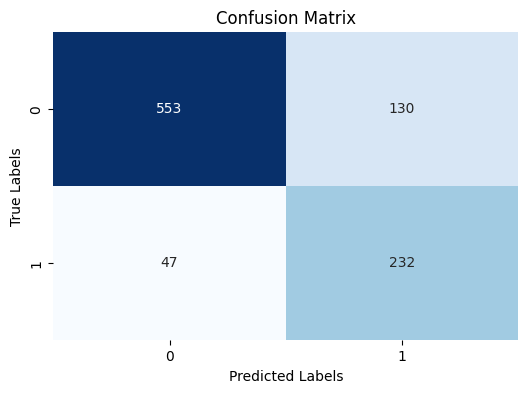


Class-wise Accuracy:
Class 0: 553/683 (80.97%)
Class 1: 232/279 (83.15%)

Precision-Recall Curve:


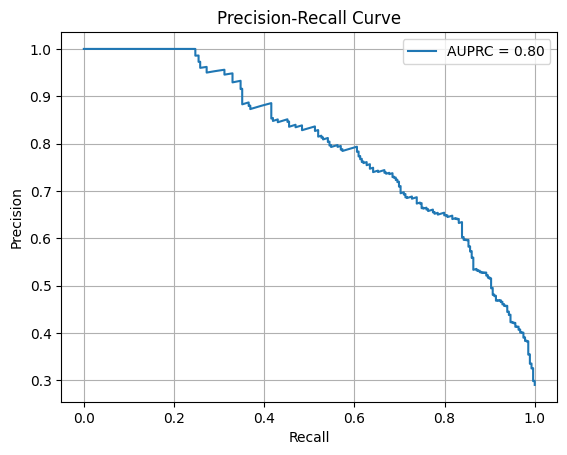


ROC Curve:


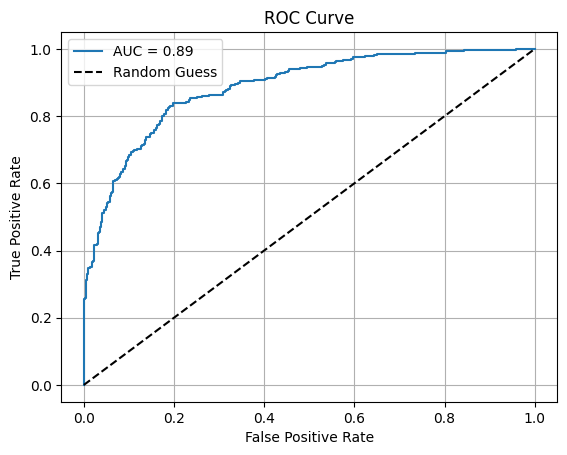


Mean F1 Score: 0.7930
Balanced Accuracy: 0.8206
Average AUPRC: 0.7972

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       683
           1       0.64      0.83      0.72       279

    accuracy                           0.82       962
   macro avg       0.78      0.82      0.79       962
weighted avg       0.84      0.82      0.82       962


RESULTS FOR PARAMETER SET 4:
Balanced Accuracy for each fold: ['0.7331', '0.7264', '0.7567', '0.7927', '0.8206']
Average Balanced Accuracy across all folds: 0.7659
Best fold (Fold 5) class-wise accuracy: ['0.8097', '0.8315']
AUPRC for each fold: ['0.6891', '0.7335', '0.7361', '0.7607', '0.7972']
Average AUPRC across all folds: 0.7433

PARAMETER SET 5
Parameters: {'ff_dim': 32, 'dropout_rate': 0.37836353824573477, 'embed_dim': 512, 'learning_rate': 3.461539792790534e-05, 'weight_decay': 0.0002545677491856814, 'batch_size': 32, 'num_heads': 8, 'num_transformer_blocks': 8}


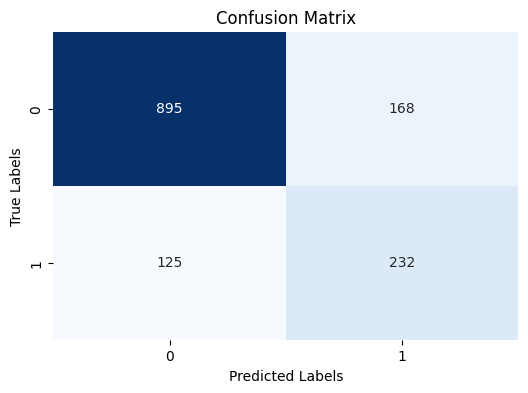


Class-wise Accuracy:
Class 0: 895/1063 (84.20%)
Class 1: 232/357 (64.99%)

Precision-Recall Curve:


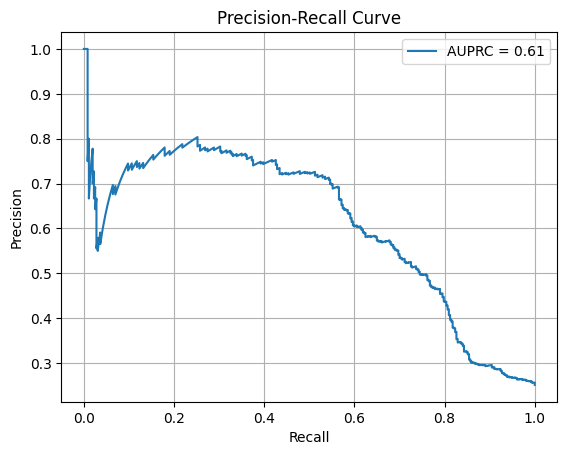


ROC Curve:


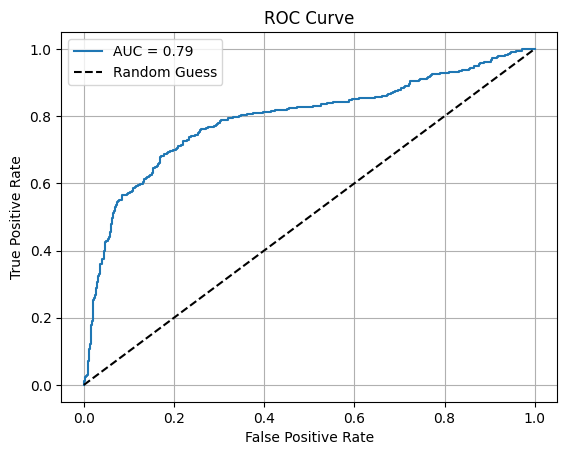


Mean F1 Score: 0.7361
Balanced Accuracy: 0.7459
Average AUPRC: 0.6100

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1063
           1       0.58      0.65      0.61       357

    accuracy                           0.79      1420
   macro avg       0.73      0.75      0.74      1420
weighted avg       0.80      0.79      0.80      1420

Fold No: 2
Epoch [1/100], Loss: 0.7099, Accuracy: 0.5812
Validation Loss: 0.7202, Validation Accuracy: 0.6404
Epoch [2/100], Loss: 0.6488, Accuracy: 0.6961
Validation Loss: 0.5992, Validation Accuracy: 0.6303
Epoch [3/100], Loss: 0.6468, Accuracy: 0.6811
Validation Loss: 0.5866, Validation Accuracy: 0.6430
Epoch [4/100], Loss: 0.6292, Accuracy: 0.7222
Validation Loss: 0.5753, Validation Accuracy: 0.6832
Epoch [5/100], Loss: 0.6108, Accuracy: 0.7565
Validation Loss: 0.5910, Validation Accuracy: 0.7515
Epoch [6/100], Loss: 0.5940, Accuracy: 0.7851
Validation Loss: 0.5697, V

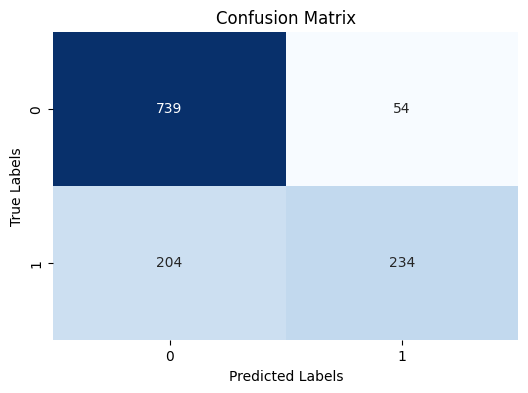


Class-wise Accuracy:
Class 0: 739/793 (93.19%)
Class 1: 234/438 (53.42%)

Precision-Recall Curve:


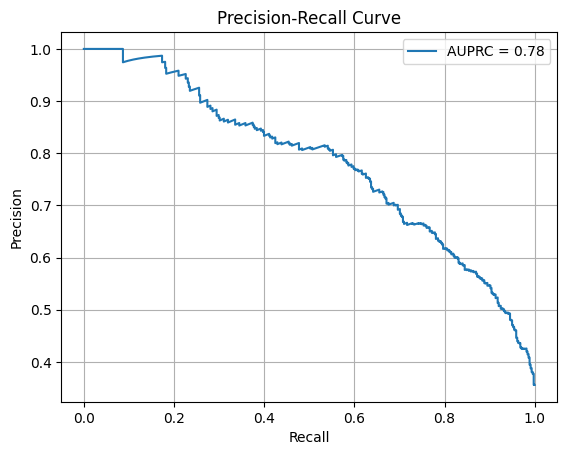


ROC Curve:


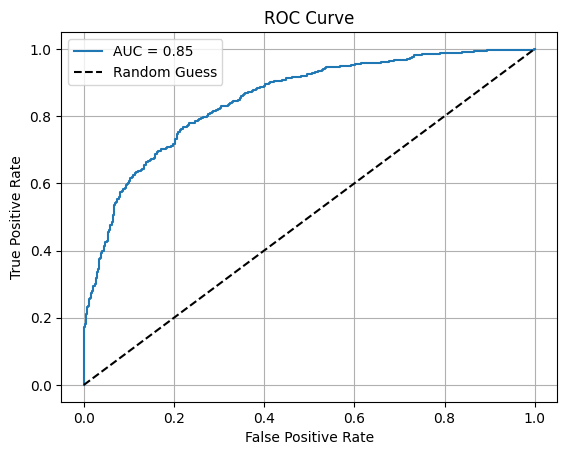


Mean F1 Score: 0.7480
Balanced Accuracy: 0.7331
Average AUPRC: 0.7802

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       793
           1       0.81      0.53      0.64       438

    accuracy                           0.79      1231
   macro avg       0.80      0.73      0.75      1231
weighted avg       0.79      0.79      0.78      1231

Fold No: 3
Epoch [1/100], Loss: 0.7382, Accuracy: 0.5124
Validation Loss: 0.7815, Validation Accuracy: 0.5076
Epoch [2/100], Loss: 0.6877, Accuracy: 0.5659
Validation Loss: 0.6440, Validation Accuracy: 0.5701
Epoch [3/100], Loss: 0.6750, Accuracy: 0.6056
Validation Loss: 0.6357, Validation Accuracy: 0.6380
Epoch [4/100], Loss: 0.6429, Accuracy: 0.6926
Validation Loss: 0.6328, Validation Accuracy: 0.6633
Epoch [5/100], Loss: 0.6377, Accuracy: 0.7111
Validation Loss: 0.6660, Validation Accuracy: 0.6849
Epoch [6/100], Loss: 0.6006, Accuracy: 0.7673
Validation Loss: 0.6210, V

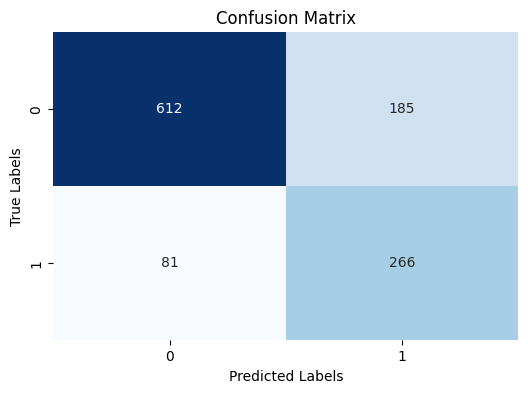


Class-wise Accuracy:
Class 0: 612/797 (76.79%)
Class 1: 266/347 (76.66%)

Precision-Recall Curve:


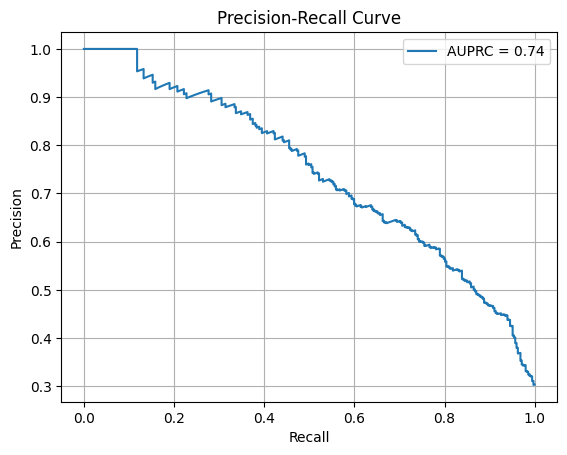


ROC Curve:


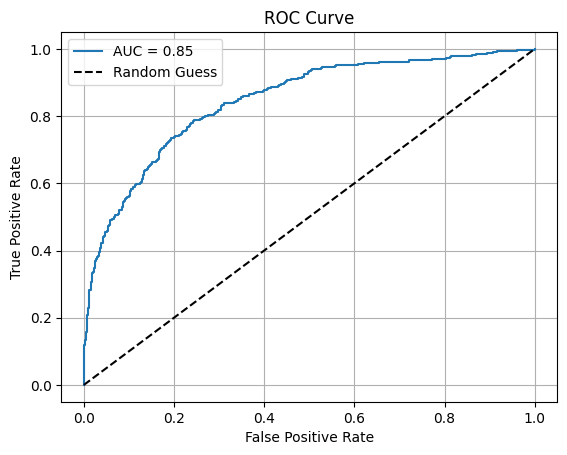


Mean F1 Score: 0.7441
Balanced Accuracy: 0.7672
Average AUPRC: 0.7419

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       797
           1       0.59      0.77      0.67       347

    accuracy                           0.77      1144
   macro avg       0.74      0.77      0.74      1144
weighted avg       0.79      0.77      0.77      1144

Fold No: 4
Epoch [1/100], Loss: 0.8208, Accuracy: 0.5116
Validation Loss: 0.6684, Validation Accuracy: 0.5445
Epoch [2/100], Loss: 0.6866, Accuracy: 0.5689
Validation Loss: 0.7526, Validation Accuracy: 0.5401
Epoch [3/100], Loss: 0.6582, Accuracy: 0.6439
Validation Loss: 0.6742, Validation Accuracy: 0.6937
Epoch [4/100], Loss: 0.6702, Accuracy: 0.6215
Validation Loss: 0.6532, Validation Accuracy: 0.6998
Epoch [5/100], Loss: 0.6672, Accuracy: 0.6387
Validation Loss: 0.6541, Validation Accuracy: 0.7045
Epoch [6/100], Loss: 0.6472, Accuracy: 0.6783
Validation Loss: 0.7552, V

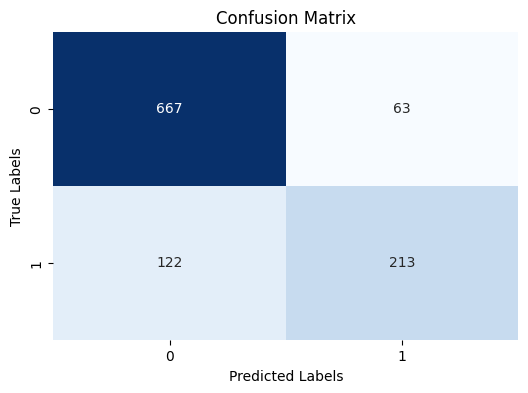


Class-wise Accuracy:
Class 0: 667/730 (91.37%)
Class 1: 213/335 (63.58%)

Precision-Recall Curve:


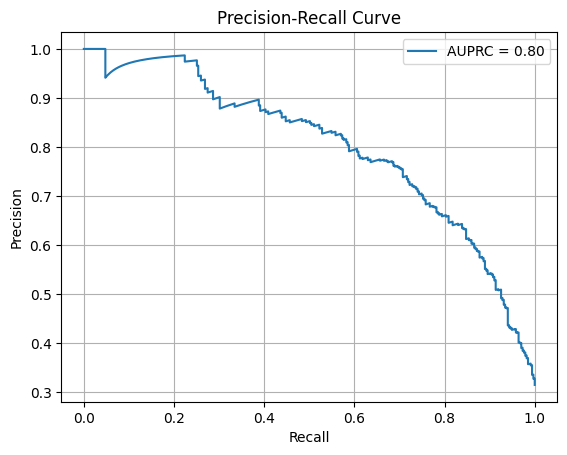


ROC Curve:


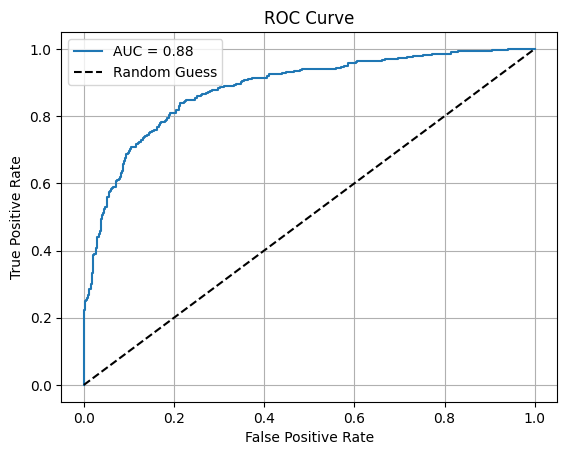


Mean F1 Score: 0.7877
Balanced Accuracy: 0.7748
Average AUPRC: 0.8010

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       730
           1       0.77      0.64      0.70       335

    accuracy                           0.83      1065
   macro avg       0.81      0.77      0.79      1065
weighted avg       0.82      0.83      0.82      1065

Fold No: 5
Epoch [1/100], Loss: 0.7439, Accuracy: 0.5390
Validation Loss: 0.7061, Validation Accuracy: 0.5720
Epoch [2/100], Loss: 0.6812, Accuracy: 0.5845
Validation Loss: 0.6461, Validation Accuracy: 0.6798
Epoch [3/100], Loss: 0.6727, Accuracy: 0.6353
Validation Loss: 0.6643, Validation Accuracy: 0.7010
Epoch [4/100], Loss: 0.6378, Accuracy: 0.6944
Validation Loss: 0.6044, Validation Accuracy: 0.7066
Epoch [5/100], Loss: 0.6436, Accuracy: 0.6856
Validation Loss: 0.6176, Validation Accuracy: 0.7473
Epoch [6/100], Loss: 0.6157, Accuracy: 0.7430
Validation Loss: 0.6951, V

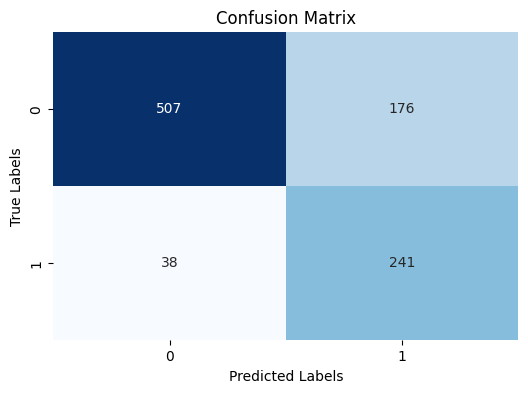


Class-wise Accuracy:
Class 0: 507/683 (74.23%)
Class 1: 241/279 (86.38%)

Precision-Recall Curve:


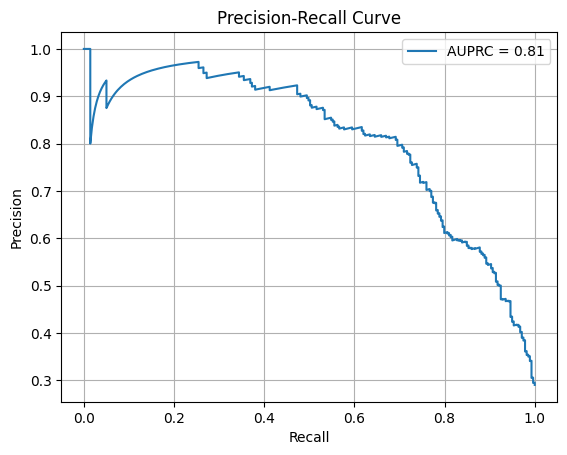


ROC Curve:


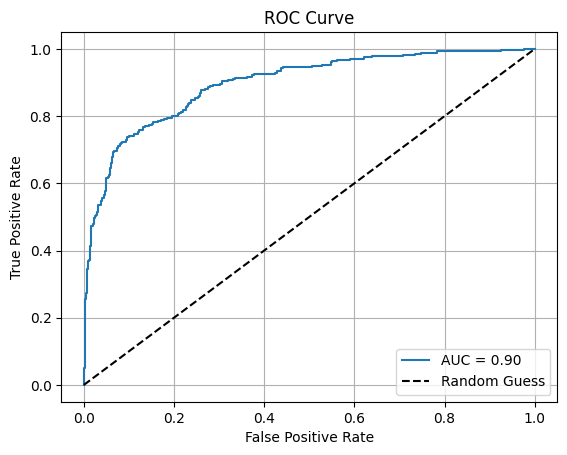


Mean F1 Score: 0.7591
Balanced Accuracy: 0.8031
Average AUPRC: 0.8087

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       683
           1       0.58      0.86      0.69       279

    accuracy                           0.78       962
   macro avg       0.75      0.80      0.76       962
weighted avg       0.83      0.78      0.79       962


RESULTS FOR PARAMETER SET 5:
Balanced Accuracy for each fold: ['0.7459', '0.7331', '0.7672', '0.7748', '0.8031']
Average Balanced Accuracy across all folds: 0.7648
Best fold (Fold 5) class-wise accuracy: ['0.7423', '0.8638']
AUPRC for each fold: ['0.6100', '0.7802', '0.7419', '0.8010', '0.8087']
Average AUPRC across all folds: 0.7484

SUMMARY OF ALL 5 PARAMETER SETS

Parameter Set 1:
Balanced Accuracy for each fold: ['0.7383', '0.6636', '0.7628', '0.8039', '0.7862']
Average Balanced Accuracy: 0.7510
Best fold class-wise accuracy: ['0.9301', '0.6776']
AUPRC for each fold:

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Parameter sets to test
parameter_sets = [
    {'ff_dim': 32, 'dropout_rate': 0.4099952333473971, 'embed_dim': 512, 'learning_rate': 3.9184066289991565e-05, 'weight_decay': 2.0147478549329628e-05, 'batch_size': 32, 'num_heads': 8, 'num_transformer_blocks': 8},
    {'ff_dim': 32, 'dropout_rate': 0.41853152648379743, 'embed_dim': 1024, 'learning_rate': 3.625518171447465e-07, 'weight_decay': 2.2825359494028837e-05, 'batch_size': 10, 'num_heads': 8, 'num_transformer_blocks': 1},
    {'ff_dim': 32, 'dropout_rate': 0.18991275507279126, 'embed_dim': 1024, 'learning_rate': 3.4398216475610645e-07, 'weight_decay': 4.3924727014694645e-06, 'batch_size': 10, 'num_heads': 8, 'num_transformer_blocks': 1},
    {'ff_dim': 32, 'dropout_rate': 0.4420138205390315, 'embed_dim': 512, 'learning_rate': 1.0832884746780947e-05, 'weight_decay': 3.9571476864810075e-05, 'batch_size': 32, 'num_heads': 8, 'num_transformer_blocks': 1},
    {'ff_dim': 32, 'dropout_rate': 0.37836353824573477, 'embed_dim': 512, 'learning_rate': 3.461539792790534e-05, 'weight_decay': 0.0002545677491856814, 'batch_size': 32, 'num_heads': 8, 'num_transformer_blocks': 8}
]

all_results = []

for param_idx, params in enumerate(parameter_sets):
    print(f"\n{'='*80}")
    print(f"PARAMETER SET {param_idx + 1}")
    print(f"{'='*80}")
    print(f"Parameters: {params}")
    print(f"{'='*80}\n")
    
    # Set parameters
    ff_dim = params['ff_dim']
    dropout_rate = params['dropout_rate']
    embed_dim = params['embed_dim']
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']
    num_attention_heads = params['num_heads']
    num_transformer_blocks = params['num_transformer_blocks']
    
    fold_accuracies = []
    fold_confusion_matrices = []
    fold_auprcs = []
    test_folds_chosen = []
    val_folds_chosen = []

    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = TransformerModel(input_shape=input_shape, num_classes=num_classes,num_transformer_blocks=num_transformer_blocks,num_heads=num_attention_heads,ff_dim=ff_dim,embed_dim=embed_dim)
        fold_model.to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.AdamW(fold_model.parameters(),weight_decay=weight_decay, lr=learning_rate)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)  # Transpose to match PyTorch input format

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)

        test_labels_binarized = test_labels_list
        test_auprcs = []

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Final metrics across all folds for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Find best fold and its class-wise accuracy
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_cm = fold_confusion_matrices[best_fold_idx]
    best_fold_class_acc = np.diag(best_fold_cm) / np.sum(best_fold_cm, axis=1)
    
    print(f'\n{"="*50}')
    print(f'RESULTS FOR PARAMETER SET {param_idx + 1}:')
    print(f'{"="*50}')
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in fold_accuracies]}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy:.4f}')
    print(f'Best fold (Fold {best_fold_idx + 1}) class-wise accuracy: {[f"{acc:.4f}" for acc in best_fold_class_acc]}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in fold_auprcs]}')
    print(f'Average AUPRC across all folds: {average_auprc:.4f}')
    
    # Store results
    all_results.append({
        'parameter_set': param_idx + 1,
        'parameters': params,
        'fold_accuracies': fold_accuracies,
        'mean_accuracy': mean_accuracy,
        'best_fold_class_acc': best_fold_class_acc,
        'fold_auprcs': fold_auprcs,
        'average_auprc': average_auprc
    })

# Summary of all parameter sets
print(f'\n{"="*80}')
print(f'SUMMARY OF ALL 5 PARAMETER SETS')
print(f'{"="*80}')

for i, result in enumerate(all_results):
    print(f'\nParameter Set {i + 1}:')
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in result["fold_accuracies"]]}')
    print(f'Average Balanced Accuracy: {result["mean_accuracy"]:.4f}')
    print(f'Best fold class-wise accuracy: {[f"{acc:.4f}" for acc in result["best_fold_class_acc"]]}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in result["fold_auprcs"]]}')
    print(f'Average AUPRC: {result["average_auprc"]:.4f}')
